# Plotting the time series of SST along with the trend during last 10 years

In [7]:
#Import necessary Modules
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from netCDF4 import Dataset
import matplotlib.pyplot as plt
import numpy as np
import netCDF4 as nc
import glob
import xarray as xr
import datetime as dt
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter

In [8]:
##############Read Sample File for coordinates#################
file_samp  ='/mnt/rc/NOAA-COBE-SST/sst.mon.mean.nc'
f = nc.Dataset(file_samp)
lat=f.variables['lat'][:]
lon=f.variables['lon'][:]
sst_atts=f.variables['sst']
sst=f.variables['sst'][1440:1560,:,:]           #Upto 2010-2020 december
time=f.variables['time'][1440:1560]
print(time.shape)

(120,)


In [9]:
#############Subsetting for Nino 3.4 region###########
latbounds=[-5,5]
lonbounds=[190, 240]
latselect=np.logical_and(lat>=latbounds[0],lat<=latbounds[1])
lonselect=np.logical_and(lon>=lonbounds[0],lon<=lonbounds[1])
sst_nino=sst[:,latselect,:][:,:,lonselect]
print(sst_nino.shape)
sst_avg=np.mean(sst_nino,axis=(1,2))
print(sst_avg.shape)

(120, 10, 50)
(120,)


In [10]:
#########Creating date strings for X axis#############
years=np.arange(2010,2021,1)
print(years)
x_lab=np.arange(0,sst.shape[0],12)
x=np.arange(0,sst.shape[0])

[2010 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020]


In [11]:
##############Fitting a polynomial to find trend#######
trend=np.polyfit(x,sst_avg,1)
print(trend.shape)
y_hat = np.poly1d(trend)(x)
print(y_hat.shape)

(2,)
(120,)


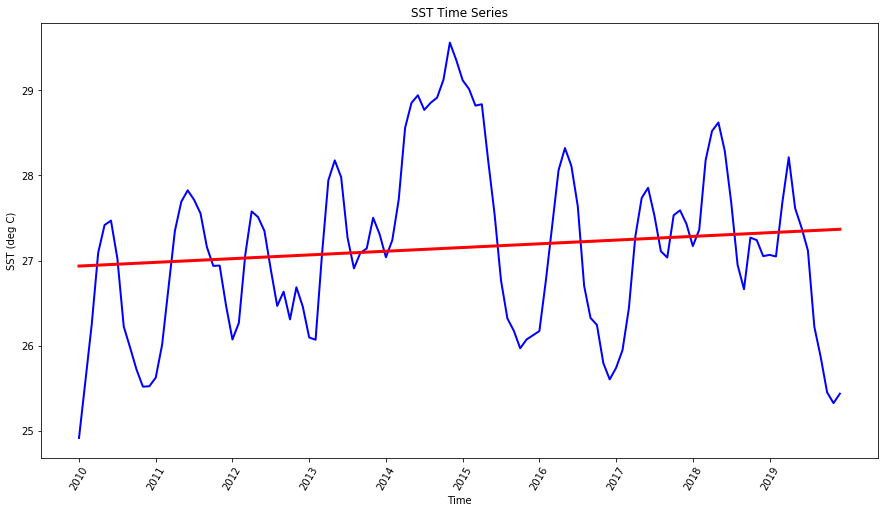

In [12]:
# Plot the leading PC time series.
plt.figure(figsize=(15,8))
plt.plot(x, sst_avg, color='b', linewidth=2, label='SST')
plt.plot(x, y_hat,color='r', linewidth=3, label='Trend')
#plt.axhline(0, color='k')
plt.title('SST Time Series')
plt.xlabel('Time')
plt.xticks(x_lab,years,rotation=60)
plt.ylabel('SST (deg C)')

plt.savefig('trend_analysis_sst_nino3.4.png')